In [131]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
#reading the data
df = pd.read_csv('GRE_Reg_Data.csv')

In [132]:
#displaying the first 10 rows of the data
df.head(10)


,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex,Hour,Time Period,Age Group,OCC HOUR,Day/Night
0,221412410,2022-06-15,2020-11-12,1700,31,M,17,Day,26-34,17,Day
1,220314085,2022-07-22,2020-05-12,1110,27,F,11,Day,26-34,11,Day
2,222013040,2022-08-06,2020-06-04,1620,60,M,16,Day,55-64,16,Day
3,220614831,2022-08-18,2020-08-17,1200,28,M,12,Day,26-34,12,Day
4,231207725,2023-02-27,2020-01-27,635,37,M,6,Day,35-44,6,Day
5,220213256,2022-07-14,2020-07-14,900,79,M,9,Day,65+,9,Day
6,221216052,2022-07-07,2020-02-23,1000,28,F,10,Day,26-34,10,Day
7,221515929,2022-10-10,2020-04-01,1200,33,M,12,Day,26-34,12,Day
8,231906599,2023-03-03,2020-01-14,1335,35,M,13,Day,35-44,13,Day
9,231207476,2023-02-27,2020-08-15,1,72,M,0,Night,65+,0,Night


In [109]:
# Convert date columns to datetime format
df['Date Registered'] = pd.to_datetime(df['Date Registered'], errors='coerce')
df['DATE OF EXAM OCC'] = pd.to_datetime(df['DATE OF EXAM OCC'], errors='coerce')

# Fill missing values in Sex column with mode
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)

# Convert TIME OCC to integer and format it to four digits, handle non-numeric values
df['TIME OCC'] = pd.to_numeric(df['TIME OCC'], errors='coerce').fillna(0).astype(int).apply(lambda x: f"{x:04d}")

# Handle unrealistic age values (e.g., 0 years old)
df.loc[df['Age'] == 0, 'Age'] = df['Age'].median()

# Remove any rows with missing values
df.dropna(inplace=True)

In [110]:
# Display the first 50 rows of the cleaned data
df.head(50)

,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex
0,221412410,2022-06-15,2020-11-12,1700,31,M
1,220314085,2022-07-22,2020-05-12,1110,27,F
2,222013040,2022-08-06,2020-06-04,1620,60,M
3,220614831,2022-08-18,2020-08-17,1200,28,M
4,231207725,2023-02-27,2020-01-27,0635,37,M
5,220213256,2022-07-14,2020-07-14,0900,79,M
6,221216052,2022-07-07,2020-02-23,1000,28,F
7,221515929,2022-10-10,2020-04-01,1200,33,M
8,231906599,2023-03-03,2020-01-14,1335,35,M
9,231207476,2023-02-27,2020-08-15,0001,72,M


In [111]:
# Extract hour from TIME OCC
df['Hour'] = df['TIME OCC'].str[:2].astype(int)

In [112]:
# Calculate the frequency of each hour
hourly_frequency = df['Hour'].value_counts().sort_index()

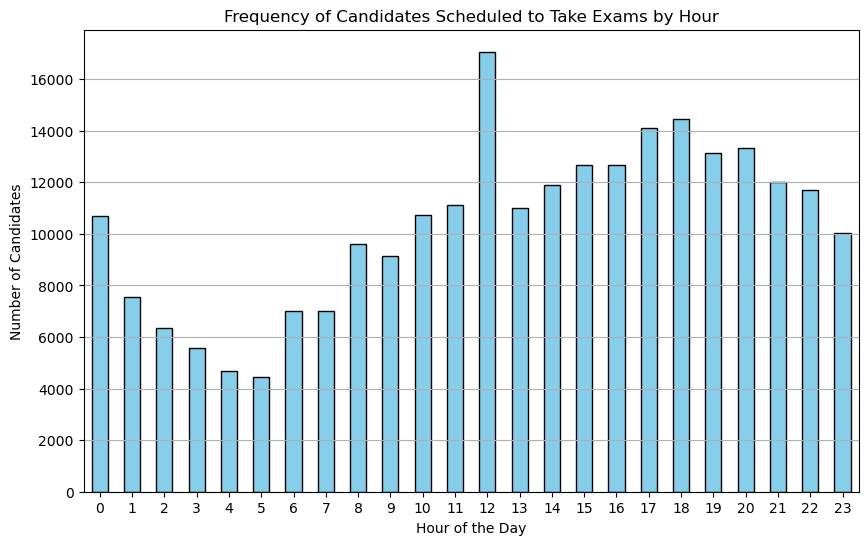

0     10696
1      7564
2      6352
3      5564
4      4696
5      4440
6      7008
7      7011
8      9600
9      9138
10    10720
11    11120
12    17065
13    11009
14    11889
15    12671
16    12676
17    14107
18    14447
19    13146
20    13325
21    12008
22    11697
23    10039
Name: Hour, dtype: int64

In [113]:
# Plot the frequency of each hour
plt.figure(figsize=(10, 6))
hourly_frequency.plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Candidates')
plt.title('Frequency of Candidates Scheduled to Take Exams by Hour')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

hourly_frequency

In [114]:
import seaborn as sns

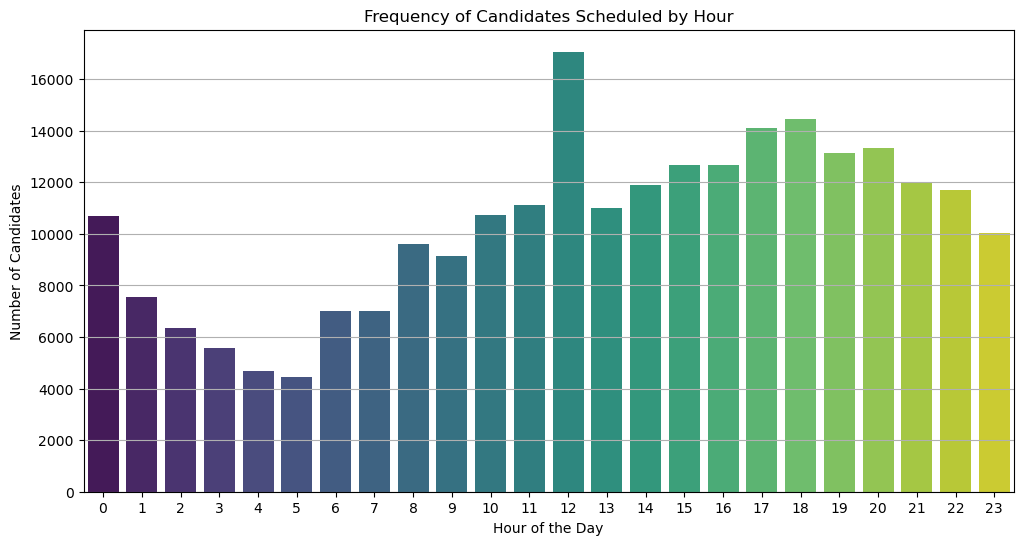

In [115]:
# Calculate the frequency of candidates scheduled per hour
hourly_freq = df['Hour'].value_counts().sort_index()

# Plotting the frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_freq.index, y=hourly_freq.values, palette='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Candidates')
plt.title('Frequency of Candidates Scheduled by Hour')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

# Determine the hour with the highest frequency
most_frequent_hour = hourly_freq.idxmax()

In [116]:
print(f"The hour with the highest frequency of candidates scheduled is {most_frequent_hour}:00 with {hourly_freq[most_frequent_hour]} candidates.")

The hour with the highest frequency of candidates scheduled is 12:00 with 17065 candidates.


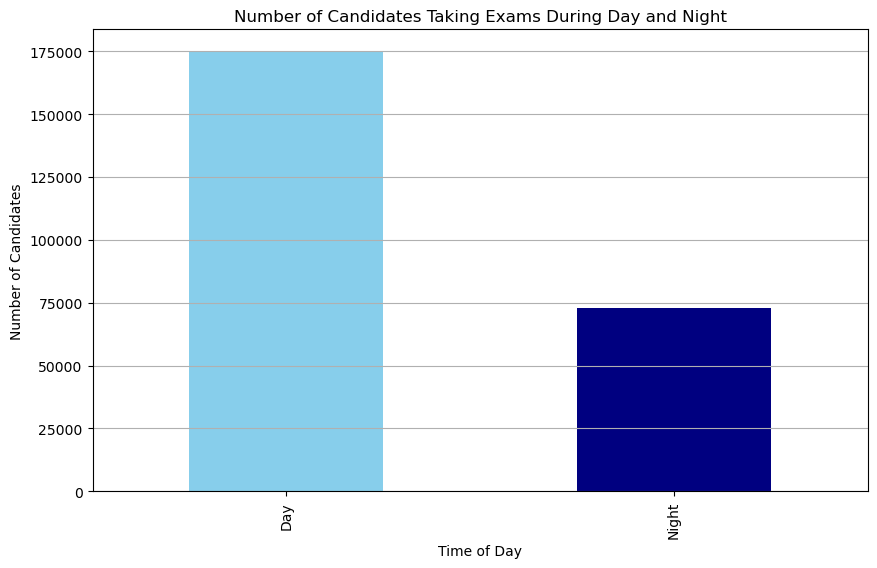

In [125]:
# Convert TIME OCC to integer
df['TIME OCC'] = pd.to_numeric(df['TIME OCC'], errors='coerce').fillna(0).astype(int)

# Extract hour part from TIME OCC
df['OCC HOUR'] = (df['TIME OCC'] // 100) % 24

# Define day and night based on the hour of the exam
df['Day/Night'] = df['OCC HOUR'].apply(lambda x: 'Day' if 6 <= x < 21 else 'Night')

# Frequency of candidates during day and night
day_night_freq = df['Day/Night'].value_counts()

# Plotting the stacked bar graph
plt.figure(figsize=(10, 6))
day_night_freq.plot(kind='bar', color=['skyblue', 'navy'])
plt.title('Number of Candidates Taking Exams During Day and Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Candidates')
plt.grid(axis='y')
plt.show()

In [126]:
# Define age bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, 100]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

In [127]:
# Categorize ages into groups
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [128]:
# Frequency of candidates in each age group
age_group_freq = df['Age Group'].value_counts().sort_index()

In [129]:
# Display the frequency
age_group_freq

0-17       3624
18-25     24366
26-34    109528
35-44     43759
45-54     29247
55-64     21116
65+       16315
Name: Age Group, dtype: int64

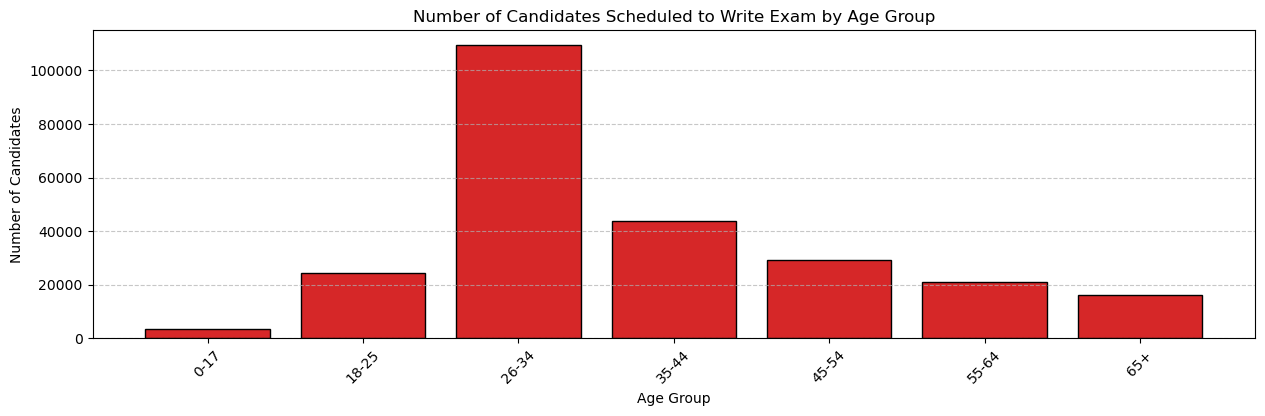

In [130]:
# Handle age values 
df.loc[df['Age'] == 0, 'Age'] = df['Age'].median()

# Define age groups
age_bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of candidates in each age group
age_group_counts = df['Age Group'].value_counts().sort_index()

# Plot the frequency of candidates in each age group
plot_df(age_group_counts, x=age_group_counts.index, y=age_group_counts.values, title='Number of Candidates Scheduled to Write Exam by Age Group', xlabel='Age Group', ylabel='Number of Candidates')

### Thank you for Reading :)